In [1]:
import pandas as pd
from io import StringIO
import numpy as np
import datetime
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
#% matplotlib inline
#plt.style.use('ggplot')


In [3]:
#results_location=r'C:\Users\Sharyn\Desktop\Datasets\sandp500\XXX_data\consolidated_XXX_0.csv'
results_location=r'C:\Users\Sharyn\Desktop\Datasets\sandp500\trade_on_conditions_data\consolidated_trade_on_conditions_0.csv'
#results_location=r'C:\Users\Sharyn\Desktop\Datasets\sandp500\indicated_data\AET_indicated.csv'
#results_location=r'C:\Users\Sharyn\Desktop\Datasets\sandp500\P10_data\consolidated_P10_0.csv'
#results_location=r'C:\Users\Sharyn\Desktop\Datasets\sandp500\low_sigma_data\consolidated_low_sigma_0.csv'
cdf=pd.read_csv(results_location)
pd.options.display.max_columns
pd.set_option('display.max_columns',25)
cdf.head(30)

,Open,High,Low,Close,Volume,Name,Slope,Slope_rate,10ma,20ma,+2sigma,-2sigma,...,Vol_mavg,Vol_pct,Daily_Return,Daily_Return_ma,RSI,Entry_Date,Exit_Date,Duration,Target,Stop_Loss,GL,GL_Status
0,9.64,9.76,9.50,9.70,4311130,AES,-0.062,0.043,9.490,9.3600,9.948164,8.771836,...,6673752.90,-0.325950,0.831601,0.631897,59.291447,2016-02-18,2016-02-19,1,9.451,9.2150,-29.00,0
1,9.66,9.80,9.53,9.79,4767240,AES,0.185,0.129,9.455,9.4060,10.002424,8.809576,...,6331393.25,0.116175,4.038257,0.367171,59.132588,2016-02-22,2016-04-04,42,11.536,9.3005,157.00,1
2,11.41,11.47,11.24,11.32,4277121,AES,-0.002,0.048,11.195,11.2200,11.478905,10.961095,...,3693711.30,0.250974,-1.135371,0.049046,54.127835,2016-05-11,2016-05-13,2,11.210,10.7540,-16.00,0
3,11.24,11.44,11.22,11.39,3685267,AES,-0.027,-0.041,11.010,11.0475,11.479771,10.615229,...,4299218.45,-0.482970,1.515152,0.149400,58.859050,2016-06-06,2016-06-10,4,11.217,10.8205,-19.00,0
4,11.71,11.91,11.68,11.85,7611348,AES,0.001,0.085,11.365,11.1875,11.753776,10.621224,...,4700158.75,-0.045140,2.067183,0.434863,66.260170,2016-06-20,2016-06-27,7,11.630,11.2575,-44.00,0
5,11.90,12.09,11.85,12.03,6747173,AES,-0.130,-0.147,11.794,11.5160,12.262089,10.769911,...,5747754.80,-0.163349,2.035623,0.493905,61.156766,2016-06-29,2016-07-27,28,12.568,11.4285,34.00,1
6,12.30,12.85,12.25,12.84,7370491,AES,-0.010,-0.002,12.171,12.1900,12.581488,11.798512,...,4306382.75,1.104555,4.987735,0.276299,65.443553,2016-09-06,2016-09-09,3,12.365,12.1980,-51.00,0
7,12.74,12.84,12.67,12.78,4173307,AES,0.006,-0.011,12.618,12.3945,13.058221,11.730779,...,4992894.05,0.223575,0.629921,0.213271,58.262640,2016-09-20,2016-09-29,9,12.982,12.1410,12.00,1
8,12.27,12.43,12.21,12.41,6915229,AES,-0.011,0.061,11.864,11.8475,12.332599,11.362401,...,5527329.30,-0.329565,2.477291,0.318506,59.378493,2016-11-07,2016-11-10,3,11.871,11.7895,-62.05,0
9,11.72,11.97,11.72,11.94,5435373,AES,-0.017,-0.041,11.481,11.6565,12.369899,10.943101,...,6087655.75,0.906197,2.665520,0.145607,54.723880,2016-11-28,2016-11-30,2,11.538,11.3430,-49.00,0


In [4]:
cdf.describe()

,Open,High,Low,Close,Volume,Slope,Slope_rate,10ma,20ma,+2sigma,-2sigma,Sigma_Spread,HL_Spread,LL_Spread,Vol_mavg,Vol_pct,Daily_Return,Daily_Return_ma,RSI,Duration,Target,Stop_Loss,GL,GL_Status
count,1176.000000,1176.000000,1176.000000,1176.000000,1.176000e+03,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1.176000e+03,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000
mean,33.034430,33.531624,32.831837,33.263997,1.115385e+07,-0.013731,0.030278,32.491138,32.251212,33.732484,30.769940,2.962544,0.699787,0.718546,9.777199e+06,0.153763,1.668998,0.309776,60.513018,10.939626,33.737746,31.600797,16.584779,0.374150
std,22.300026,22.687603,22.150277,22.480265,1.855993e+07,0.186523,0.183259,21.863275,21.693203,22.832084,20.619032,3.242963,0.753716,1.317066,1.412011e+07,0.671770,4.176298,0.355941,6.368467,9.318876,23.218489,21.356252,213.241861,0.484108
min,1.940000,2.040000,1.920000,2.010000,2.141520e+05,-1.342000,-1.349000,1.892000,1.989500,2.222420,1.693898,0.171912,0.010000,-0.020000,4.345185e+05,-0.842318,-2.617672,0.000220,40.834169,1.000000,2.283000,1.909500,-548.250000,0.000000
25%,19.000000,19.202500,18.867500,19.142500,2.578129e+06,-0.083000,-0.048000,18.764500,18.589125,19.403878,17.690332,1.261307,0.310000,0.250000,2.883710e+06,-0.213164,0.226255,0.111001,56.036893,4.000000,19.082250,18.185375,-59.000000,0.000000
50%,28.830000,29.250000,28.625000,28.990000,5.101886e+06,-0.009000,0.014000,28.339000,28.097250,29.490313,26.899729,2.060734,0.490000,0.450000,5.204042e+06,0.009360,1.012056,0.221935,60.217970,8.000000,29.052500,27.540500,-20.500000,0.000000
75%,39.182500,39.795000,38.940000,39.537500,1.170195e+07,0.052000,0.093000,38.625500,38.386000,40.060125,37.085495,3.374783,0.780000,0.760000,1.048657e+07,0.353568,2.148602,0.398107,64.584610,15.000000,39.729000,37.560625,43.250000,1.000000
max,167.400000,170.070000,166.480000,167.210000,1.659393e+08,1.467000,1.684000,164.997000,163.927500,171.353939,156.501061,35.045171,10.270000,28.820000,1.394068e+08,10.703320,102.781641,5.219519,93.316771,72.000000,185.194000,158.849500,3254.000000,1.000000


In [5]:
#plt.figure(figsize=(15,10))
#scatter_matrix(cdf[['Sigma_Spread','HL_Spread','LL_Spread','Vol_mavg','Vol_pct','Daily_Return_ma','RSI']]);plt.show()

In [6]:
cdf.GL.sum()

19503.700000000008

In [7]:
#cdf.GL_Status.value_counts(normalize=True)

In [8]:
cdf['Close'].sum()*100

3911845.9999999986

In [9]:
roi=(cdf.GL.sum())/(cdf['Close'].sum()*100)

In [10]:
roi

0.00498580465590926

In [11]:
dog0=cdf[['Slope','RSI','GL_Status']]
#cdf=cdf.apply(lambda x:(x-np.min(x))/(np.max(x)-np.min(x)))
#cdf['RSI']=cdf['RSI'].apply(lambda x:(x-np.min(x))/(np.max(x)-np.min(x)))
dog0

,Slope,RSI,GL_Status
0,-0.062,59.291447,0
1,0.185,59.132588,1
2,-0.002,54.127835,0
3,-0.027,58.859050,0
4,0.001,66.260170,0
5,-0.130,61.156766,1
6,-0.010,65.443553,0
7,0.006,58.262640,1
8,-0.011,59.378493,0
9,-0.017,54.723880,0


   Slope_rate        RSI  GL_Status
0       0.043  59.291447          0
1       0.129  59.132588          1
2       0.048  54.127835          0
3      -0.041  58.859050          0
4       0.085  66.260170          0


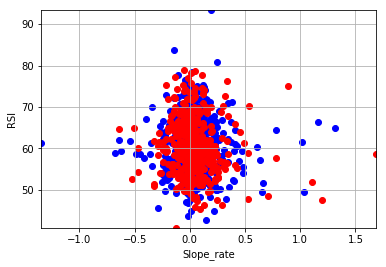

    Vol_pct        RSI  GL_Status
0 -0.325950  59.291447          0
1  0.116175  59.132588          1
2  0.250974  54.127835          0
3 -0.482970  58.859050          0
4 -0.045140  66.260170          0


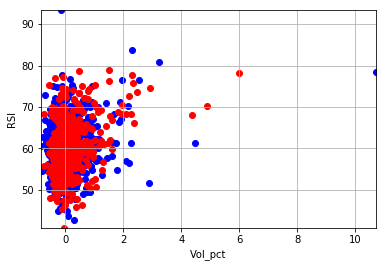

   Sigma_Spread        RSI  GL_Status
0      1.176328  59.291447          0
1      1.192849  59.132588          1
2      0.517809  54.127835          0
3      0.864541  58.859050          0
4      1.132552  66.260170          0


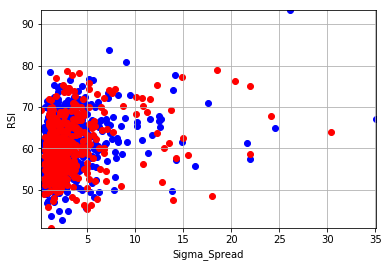

         RSI        RSI  GL_Status
0  59.291447  59.291447          0
1  59.132588  59.132588          1
2  54.127835  54.127835          0
3  58.859050  58.859050          0
4  66.260170  66.260170          0


ValueError: could not convert string to float: 'RSI'

In [12]:
dog1=['Slope_rate','Vol_pct','Sigma_Spread','RSI','Daily_Return_ma','HL_Spread','LL_Spread']
other='RSI'

for i in dog1:
    dogs=cdf[[i,other,'GL_Status']]
    print(dogs.head(5))

    xx_1=dogs[i]
    xx_2=dogs[other]
    y=dogs['GL_Status']
    ##    print('xx and y: \n',xx_1,xx_2,y,list(xx_1[y==0]))
    plt.scatter(list(xx_1[y==0]),list(xx_2[y==0]),color='b')
    plt.scatter(list(xx_1[y==1]),list(xx_2[y==1]),color='r')
    plt.xlabel(i)
    plt.ylabel(other)
    plt.xlim(xx_1.min(),xx_1.max())
    #plt.xlim(0,.2)
    plt.ylim(xx_2.min(),xx_2.max())
    plt.grid()
    plt.show()

In [ ]:
plt.hist(xx_1,bins=50);plt.show()

In [ ]:
plt.hist2d(xx_1,xx_2);plt.show()

In [ ]:
location=r'C:\Users\Sharyn\Desktop\Datasets\sandp500\individual_stocks_5yr\AET_data.csv'
the_data=pd.read_csv(location,parse_dates=True,index_col='Date')

In [ ]:
the_data.head()